In [1]:
from sklearn.datasets import load_digits

In [6]:
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
digits.images.shape

(1797, 8, 8)

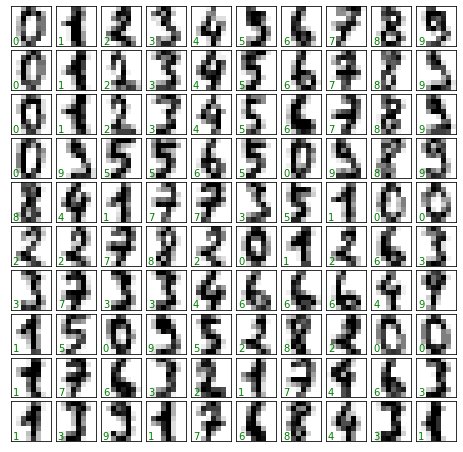

In [14]:
# images data set is a 3-D array: 1797 samples, each consisting of an 8x8 grid fo pixels. below visualize 1st 100 of these.
# handwritten digits data - each sample is represnted by one 8x8 grid of pixels
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)
                        )
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [20]:
'''using Scikit-Learn, we need 2-D [n_samples, n_features] representation. do this by:
1. treat each pixel in the image as a feature- by flattening out the pixel arrays so that we have a length-64 array of 
pixel values representing each digit.
2. we need the target array - which gives the previously determined label for each digit. these 2 quantities are built
into the digits dataset under the DATA and TARGET attributes, respectively'''
X = digits.data
print(X.shape)
X # there are 1797 samples and 64 features

(1797, 64)


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [22]:
y = digits.target
print(y.shape)
y

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

# Unsupervised learning: Dimensionality reduction

In [53]:
data_projected

array([[ 167.27247954,   22.18515653],
       [ -48.71476497,   51.30840484],
       [-100.719723  ,   25.82132196],
       ...,
       [ -51.43618206,  -23.29369929],
       [  -0.22056414,  -73.32775967],
       [ -11.36581193,  -36.23661186]])

In [23]:
# Due to difficulty of visualizing the 64-dimensional parameter space, so we'll reduce dimensions to 2.
# Manifold learning algorithm Isomap is used to tranform data to 2-D
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

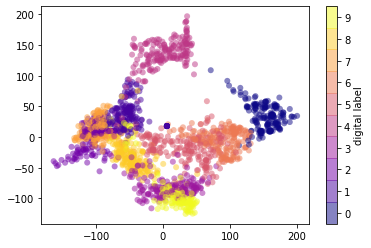

In [52]:
# plot the 2-D data to see if we can learn anything from its structure
from matplotlib import cm
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('plasma',10))
plt.colorbar(label='digital label', ticks=range(10))
plt.clim(-0.5, 9.5);